### Exercise 10
Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.


In [1]:
import numpy as np
import tensorflow as tf

In [9]:
# loads the mnist dataset, add the channels axis to the inputs,
# scales the values to the 0-1 range, and splits the dataset
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32)
X_train_full_scaled  = X_train_full / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1)
X_test_scaled = X_test / 255
X_train, X_valid = X_train_full_scaled[:-5000], X_train_full_scaled[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
from functools import partial

tf.keras.backend.clear_session()

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="swish", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

2024-05-09 17:16:31.385016: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-05-09 17:16:31.385036: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-09 17:16:31.385041: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-09 17:16:31.385075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-09 17:16:31.385098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# compiles, fits, evaluates, and uses the model to make predictions
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10


2024-05-09 17:17:48.834887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 27s 15ms/step - loss: 0.3187 - accuracy: 0.9234 - val_loss: 0.0678 - val_accuracy: 0.9834
Epoch 2/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.1479 - accuracy: 0.9683 - val_loss: 0.0824 - val_accuracy: 0.9838
Epoch 3/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0879 - accuracy: 0.9801 - val_loss: 0.0493 - val_accuracy: 0.9888
Epoch 4/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0619 - accuracy: 0.9859 - val_loss: 0.0432 - val_accuracy: 0.9890
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0618 - accuracy: 0.9859 - val_loss: 0.0481 - val_accuracy: 0.9898
Epoch 6/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.1145 - accuracy: 0.9864 - val_loss: 0.0422 - val_accuracy: 0.9904
Epoch 7/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0451 - accuracy: 0.9900 - val_loss: 0.0332 - val_accura

[120.64675903320312, 0.883400022983551]

In [5]:
model.evaluate(X_test_scaled, y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9897


[0.043454162776470184, 0.9897000193595886]

Out of curiosity, what happens if we train the model with the unscaled data?

In [19]:
tf.keras.backend.clear_session()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

optimizer = tf.keras.optimizers.legacy.Nadam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)


Epoch 1/10
1719/1719 [==============================] - 26s 14ms/step - loss: 152817.1250 - accuracy: 0.8320 - val_loss: 61222.6562 - val_accuracy: 0.9728
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 2208914.0000 - accuracy: 0.9400 - val_loss: 1415324.7500 - val_accuracy: 0.9826
Epoch 3/10
1719/1719 [==============================] - 24s 14ms/step - loss: 15754614.0000 - accuracy: 0.9532 - val_loss: 22953328.0000 - val_accuracy: 0.9784
Epoch 4/10
1719/1719 [==============================] - 25s 14ms/step - loss: 14852020.0000 - accuracy: 0.9714 - val_loss: 5096712.5000 - val_accuracy: 0.9844
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 57731004.0000 - accuracy: 0.9673 - val_loss: 54852988.0000 - val_accuracy: 0.9864
Epoch 6/10
1719/1719 [==============================] - 25s 14ms/step - loss: 79166280.0000 - accuracy: 0.9732 - val_loss: 21415286.0000 - val_accuracy: 0.9876
Epoch 7/10
1719/1719 [==========================

[260270848.0, 0.9902999997138977]

In [17]:
X_train.max(), X_valid.max()

(255.0, 255.0)

In [20]:
X_new = X_test[:10]  # pretend we have new images
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 85ms/step


In [21]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

It seems to work?? I had to switch to relu activation and the loss has crazy high values that keep increasing, but the accuracy seems fine.

### Excercise 10

Use transfer learning for large image classification, going through these steps:

1.    Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).

2.    Split it into a training set, a validation set, and a test set.

3.    Build the input pipeline, apply the appropriate preprocessing operations, and optionally add data augmentation.

4.    Fine-tune a pretrained model on this dataset.

Let's load the dataset. It consists of a subset of my own images grouped in two categories: 'chess' and 'snow':

In [6]:
import os
from pathlib import Path

filepath = Path(os.path.expanduser('~')) / 'Pictures' / 'ml'

In [69]:
train_set, valid_full_set = tf.keras.utils.image_dataset_from_directory(filepath, batch_size=None, seed=42, 
                                                                        validation_split=0.2, subset="both",
                                                                        crop_to_aspect_ratio=True)

Found 272 files belonging to 2 classes.


Using 218 files for training.
Using 54 files for validation.


In [25]:
class_names = ["chess", "snow"]

In [70]:
valid_set, test_set = tf.keras.utils.split_dataset(valid_full_set, left_size=0.5)

In [71]:
rescale = tf.keras.layers.Rescaling(scale=1. / 255)
train_set_scaled_for_imshow = train_set.map(lambda X, y: (rescale(X), y))

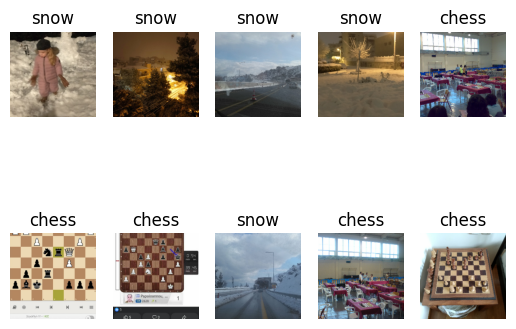

In [72]:
import matplotlib.pyplot as plt

plt.figure()
for i, item in enumerate(train_set_scaled_for_imshow.take(10)):
    plt.subplot(2, 5, i+1)
    plt.imshow(item[0])
    plt.title(class_names[item[1]])
    plt.axis('off')

The `chess` class contains less images than the `snow` class, so we should probably try data augmentation for the underrepresented class. 

But let's go with what we have for now.
We will use the Xception model. We should use the corresponding preprocess_input function on the input data:

In [73]:
preprocess = tf.keras.applications.xception.preprocess_input
batch_size = 16
train_set = train_set.map(lambda X, y: (preprocess(X), y))
train_set = train_set.batch(batch_size).prefetch(1)
valid_set = valid_set.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

Now let's instantiate the model, ommitting the top layers and add our own top:

In [74]:
tf.keras.backend.clear_session()

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(2, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [75]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [76]:
# Freeze the weights of the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [77]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.05, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
14/14 [==============================] - 6s 255ms/step - loss: 0.1606 - accuracy: 0.9083 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 2s 86ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9630
Epoch 3/10
14/14 [==============================] - 2s 74ms/step - loss: 5.8545e-04 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9630
Epoch 4/10
14/14 [==============================] - 2s 62ms/step - loss: 3.2811e-04 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9630
Epoch 5/10
14/14 [==============================] - 2s 65ms/step - loss: 1.9947e-04 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9630
Epoch 6/10
14/14 [==============================] - 2s 62ms/step - loss: 1.5087e-04 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9630
Epoch 7/10
14/14 [==============================] - 2s 63ms/step - loss: 1.2469e-04 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy:

In [78]:
# Unfreeze some of the upper layers of the base models and continue training
for layer in base_model.layers[56:]:
    layer.trainable = True

In [79]:
# Recompile the model when unfreezing or freezing layers and use
# a smaller learning rate to avoid damaging the pretrained weights
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
14/14 [==============================] - 9s 363ms/step - loss: 0.0957 - accuracy: 0.9679 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 3s 137ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9630
Epoch 3/10
14/14 [==============================] - 3s 114ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0389 - val_accuracy: 0.9630
Epoch 4/10
14/14 [==============================] - 3s 114ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 3s 115ms/step - loss: 0.0094 - accuracy: 0.9954 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 3s 114ms/step - loss: 9.9244e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 3s 113ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Ep

In [80]:
model.evaluate(test_set)

2/2 [==============================] - 0s 48ms/step - loss: 0.0049 - accuracy: 1.0000


[0.004903397057205439, 1.0]

In [81]:
for test_batch in test_set.take(1):
    predictions = model.predict(test_batch[0])

1/1 [==============================] - 1s 1s/step


In [82]:
predictions

array([[9.99999166e-01, 8.57733653e-07],
       [7.17932533e-04, 9.99282062e-01],
       [1.00000000e+00, 5.20384580e-09],
       [9.99961615e-01, 3.83664301e-05],
       [5.70961092e-08, 1.00000000e+00],
       [9.99996185e-01, 3.84762006e-06],
       [1.00000000e+00, 2.56668593e-11],
       [4.68823885e-07, 9.99999523e-01],
       [6.78368082e-08, 9.99999881e-01],
       [9.75152190e-08, 9.99999881e-01],
       [3.17546306e-04, 9.99682426e-01],
       [3.94607635e-09, 1.00000000e+00],
       [1.74623804e-09, 1.00000000e+00],
       [1.02814806e-08, 1.00000000e+00],
       [1.31147029e-03, 9.98688519e-01],
       [4.05612299e-09, 1.00000000e+00]], dtype=float32)

In [83]:
test_batch

(<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
 array([[[[-0.25605088, -0.25605088, -0.25605088],
          [-0.11665136, -0.11665136, -0.11665136],
          [-0.06470591, -0.06470591, -0.06470591],
          ...,
          [-0.24166667, -0.02205884,  0.14264703],
          [-0.24705881, -0.02745098,  0.13725495],
          [-0.23921567, -0.01960784,  0.14509809]],
 
         [[-0.00645679, -0.00645679, -0.00645679],
          [-0.11376381, -0.11376381, -0.11376381],
          [-0.06292129, -0.06292129, -0.06292129],
          ...,
          [-0.27254903, -0.0529412 ,  0.11176467],
          [-0.24999231, -0.03038448,  0.13432133],
          [-0.23954505, -0.01993722,  0.14476871]],
 
         [[ 0.00625765,  0.00625765,  0.00625765],
          [-0.00682443, -0.00682443, -0.00682443],
          [-0.10354626, -0.10354626, -0.10354626],
          ...,
          [-0.23750001, -0.01348037,  0.12941182],
          [-0.23137254, -0.00735295,  0.13553917],
          [-0.23137254

In [94]:
images, labels = test_batch
tf.reduce_min(images), tf.reduce_max(images)


(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [95]:
rescale = tf.keras.layers.Rescaling(scale=0.5, offset=0.5, input_shape=(batch_size, 256, 256, 3))
images = rescale(images)


In [96]:
tf.reduce_min(images), tf.reduce_max(images)


(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

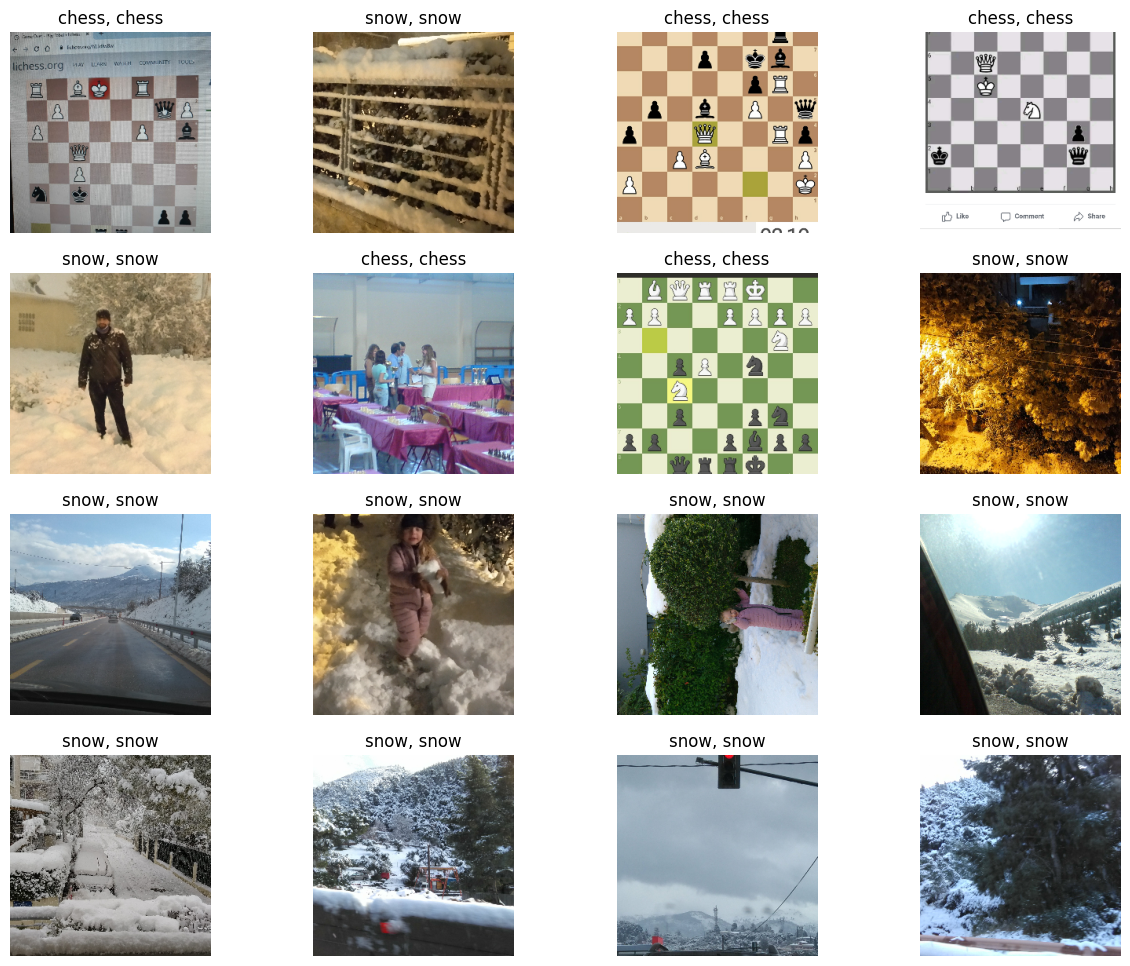

In [104]:
plt.figure(figsize=(15, 12))
for i in range(len(images)):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"{class_names[labels[i]]}, {class_names[predictions[i].argmax()]}")

Wow, it worked amazing well!